## Gaussian Naïve Bayes

## Exploratory Data Analysis

## 1.1 Import Libraries and Load data

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve

In [2]:
#Loading the data
spambase= pd.read_csv('spambase.csv')

## 1.2 Do a quick check of the data and print out the following information about the data

#### 1.2.1 Look at top 5 rows 

In [3]:
spambase.head(5)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


#### 1.2.2 Get a description of the data 

In [4]:
spambase.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


#### 1.2.3 Get dimension of data 

In [5]:
print("Dimension of the data: ", spambase.shape)
no_of_rows = spambase.shape[0]
no_of_columns = spambase.shape[1]
print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (4600, 58)
No. of Rows: 4600
No. of Columns: 58


#### 1.2.4 Get the class distribution 

In [6]:
#Counting the number of spam and not spam in the database to create a distribution
class_counts = spambase.iloc[:, -1].value_counts()
print('Class distribution:')
print('Spam:', class_counts[1])
print('Not Spam:', class_counts[0])

Class distribution:
Spam: 1812
Not Spam: 2788


#### 1.2.5 generate a bar plot to display the class distribution. You may use “seaborn”s barplot function.

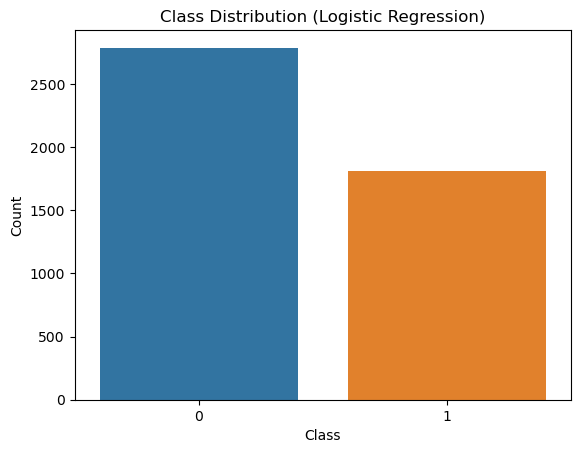

In [7]:
#Based on the spam database documentation spam (1) or not spam (0)
#This is reflected in the list shown below named classes
classes = [0,1]

#I am creating a new dataframe to describe the class distribution and then plot it using seaborn
class_dist = pd.DataFrame({'Class': classes, 'Count': class_counts})

# Create bar plot
plt.title('Class Distribution (Logistic Regression)')
sns.barplot(x='Class', y='Count', data=class_dist)

# Show plot
plt.show()

#### 1.2.6 create a separate feature set (Data Matrix X) and Target (1D Vector y) and print dimension of each. 

In [8]:
#creating different dataframes. X is related to the Features and y is the Target 
y=spambase.iloc[:,-1]
X=spambase.iloc[:,0:-1]

X.shape

(4600, 57)

In [9]:
X.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

#### 1.2.7 Create Train and Test Dataset.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.shape

(3680, 57)

In [13]:
y_test.shape

(920,)

## Train the Gaussian NB model called gaussianNB_clf

In [14]:
#Instantiating and training logistic regression model
gaussianNB_clf = GaussianNB()
gaussianNB_clf.fit(X_train, y_train)


GaussianNB()

## Analyze Model Performance

#### 3.1 Evaluate the model using ROC Curve for the Training Data using sklearn metrics.roc_curve() with two parameters: true binary labels and target scores. Plot the ROC Curve and determine the optimal threshold

For the NB classifier, use the probability estimates of the spam emails as the target score.
There are two steps to obtain the probability estimates of the spam class: 

• The NB model's predict_proba() function.
• The model_selection.cross_val_predict() function in which need to use the attribute "method" with the value "predict_proba" as: method="predict_proba". Both functions will return a n X 2 matrix (n = # of data). The second column of this matrix stores the probability of the spam class.
So you need to retrieve the values from the 2nd column of the values from the 2nd column of the returned matrix to get the
probability estimates of the spam class (target score values).

In [15]:
#Using a cross validation to predict the probabilities of the training data
train_proba_cv = cross_val_predict(gaussianNB_clf, X_train, y_train,method='predict_proba', cv=5)

#Choosing the second column containing the predicted probabilities
y_train_cv_score = train_proba_cv[:, 1]

#getting the rates and tresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_cv_score)

In [16]:
fpr.shape

(406,)

In [17]:
tpr.shape

(406,)

In [18]:
thresholds.shape

(406,)

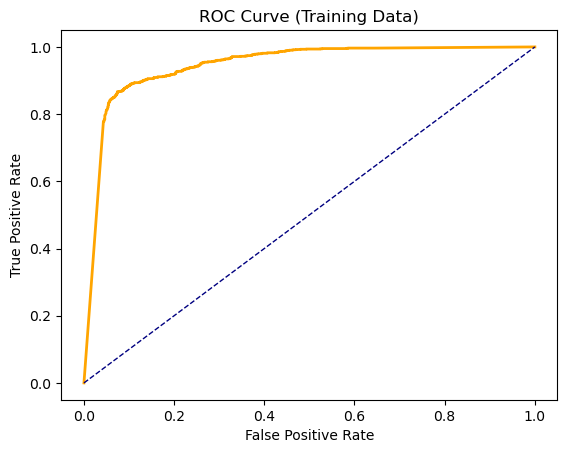

In [19]:
#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr, tpr, color='orange', linewidth=2) 
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

#### 3.2 Compute and print the AUC 

In [20]:
from sklearn.metrics import roc_auc_score
#Area under ROC curve
roc_auc_score(y_train, y_train_cv_score)


0.9446270396270396

#### 3.3 Plot the precision and recall curve as functions of threshold values

In [21]:
#testing the precision and recall for the training data
y_train_pred = gaussianNB_clf.predict(X_train)

precision_train = precision_score(y_train, y_train_pred) 
print(f"Precision = {precision_train}")

recall_train = recall_score(y_train, y_train_pred)
print(f"Recall = {recall_train}")

Precision = 0.6944585663446874
Recall = 0.9552447552447553


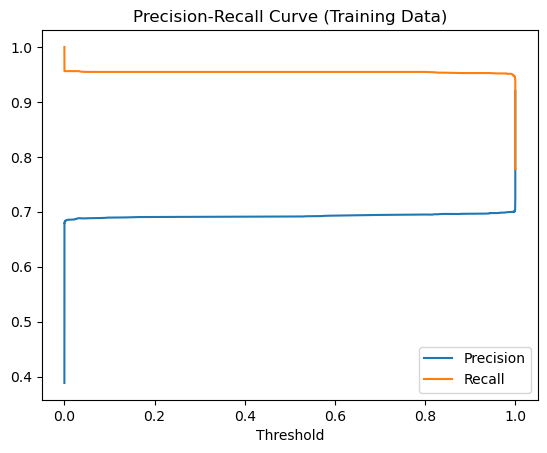

In [22]:
#getting the precision and recall values for the predicted probabilities
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_cv_score)

#plotting the curve
plt.plot(thresholds, precisions[:-1], label="Precision") 
plt.plot(thresholds, recalls[:-1], label="Recall") 
plt.xlabel("Threshold")
plt.title('Precision-Recall Curve (Training Data)')
plt.legend(loc="lower right")

plt.show()

## Evaluate the model on Test Data

### 4.1 Compute and print the confusion matrix for test data.

In [23]:
y_test_pred = gaussianNB_clf.predict(X_test)

# Confusion Matrix
print(f"Confusion Matrix (Test Data):\n {confusion_matrix(y_test, y_test_pred)}")

Confusion Matrix (Test Data):
 [[404 134]
 [ 14 368]]


### 4.2 Compute and print the test precision.

In [24]:
precision = precision_score(y_test, y_test_pred) 
print(f"Precision = {precision}")

Precision = 0.7330677290836654


### 4.3 Compute and print the test recall.

In [25]:
recall = recall_score(y_test, y_test_pred)
print(f"Recall = {recall}")

Recall = 0.9633507853403142


### 4.4 Compute and print the test F1 score.

In [26]:
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score = {f1}")

F1 Score = 0.8325791855203621


## Extra Experiments

In [27]:
#I am normalizing the data to see if it improves the model and if I get a better precision recall curve
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)  # compute minimum and maximum on the training data
X_scaled = scaler.transform(X)

In [28]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2)

In [29]:
#training the data with the scaled data
gnb_scale=GaussianNB()
gnb_scale.fit(X_train_scaled, y_train_scaled)

GaussianNB()

In [30]:
#predicting probabilities for the ROC curve
train_proba_cv2 = cross_val_predict(gnb_scale, X_train_scaled, y_train_scaled,method='predict_proba', cv=10)
y_train_cv_score2 = train_proba_cv2[:, 1]

#I am using the y_train_score2 to build the ROC curve
fpr2, tpr2, thresholds2 = roc_curve(y_train_scaled, y_train_cv_score2)

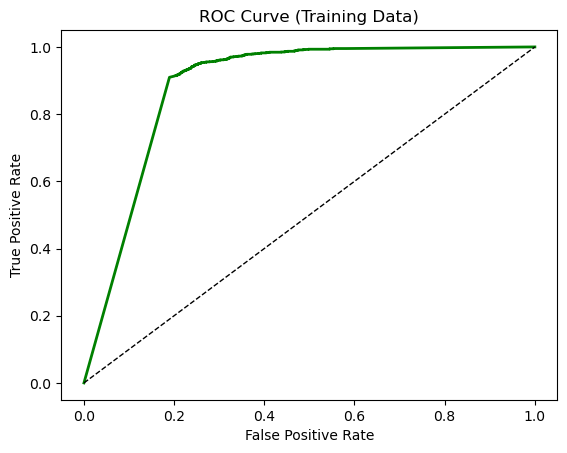

In [31]:
#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr2, tpr2, color='green', linewidth=2) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
#Area under ROC curve
roc_auc_score(y_train_scaled, y_train_cv_score2)

0.8844323090213502

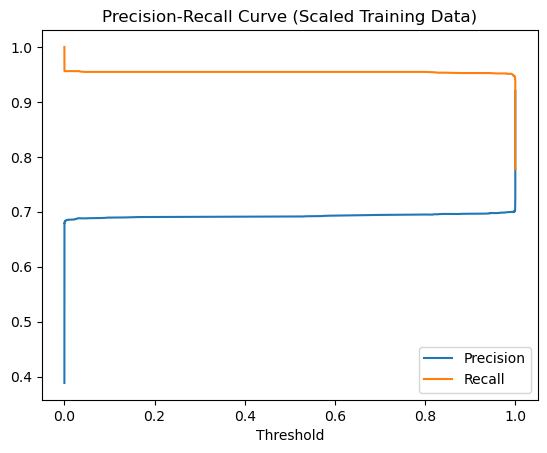

In [33]:
#getting the precision and recall values
precisions2, recalls2, thresholds2 = precision_recall_curve(y_train, y_train_cv_score)

#plotting the curve
plt.plot(thresholds2, precisions2[:-1], label="Precision") 
plt.plot(thresholds2, recalls2[:-1], label="Recall") 
plt.xlabel("Threshold")
plt.title('Precision-Recall Curve (Scaled Training Data)')
plt.legend(loc="lower right")

plt.show()

In [34]:
y_test_pred2 = gnb_scale.predict(X_test_scaled)

# Confusion Matrix
print(f"Confusion Matrix (Test Data):\n {confusion_matrix(y_test_scaled, y_test_pred2)}")

Confusion Matrix (Test Data):
 [[401 167]
 [ 16 336]]


In [35]:
precision2 = precision_score(y_test_scaled, y_test_pred2) 
print(f"Precision = {precision2}")

Precision = 0.6679920477137177


In [36]:
recall2 = recall_score(y_test_scaled, y_test_pred2)
print(f"Recall = {recall2}")

Recall = 0.9545454545454546
